In [1]:
import pandas as pd
train_data = pd.read_csv('labeledTrainData.tsv', sep='\t')
train_data

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [2]:
train_data.iloc[0].review

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

train_data['review_length'] = train_data.review.apply(len)
print(train_data)
train_data['review_length'].max()

            id  sentiment                                             review  \
0       5814_8          1  With all this stuff going down at the moment w...   
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...   
2       7759_3          0  The film starts with a manager (Nicholas Bell)...   
3       3630_4          0  It must be assumed that those who praised this...   
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...   
5       8196_8          1  I dont know why people think this is such a ba...   
6       7166_2          0  This movie could have been very good, but come...   
7      10633_1          0  I watched this video at a friend's house. I'm ...   
8        319_1          0  A friend of mine bought this film for £1, and ...   
9      8713_10          1  <br /><br />This movie is full of references. ...   
10      2486_3          0  What happens when an army of wetbacks, towelhe...   
11     6811_10          1  Although I ge

13708

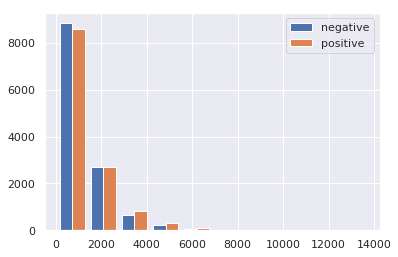

In [4]:
p = plt.hist([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], label=['negative', 'positive'])
plt.legend()
#On x-axis there is length of the review and y-axis denotes number of movies having length in that range

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = ['awesome', 'terrible'] #initially only 2 words in bag of words
simple_vectorizer = CountVectorizer(vocabulary=vocab)
bow = simple_vectorizer.fit_transform(train_data.review).todense()
print(bow)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [6]:
words=list(simple_vectorizer.vocabulary)
print(words)

['awesome', 'terrible']


In [7]:
# Convert bow to DataFrame
bow_df = pd.DataFrame(bow, index=train_data.index, columns = words)
print(bow_df)

       awesome  terrible
0            0         0
1            0         0
2            0         0
3            0         0
4            0         0
5            0         0
6            0         0
7            0         0
8            0         0
9            0         0
10           0         0
11           0         0
12           0         0
13           0         0
14           0         0
15           0         0
16           0         0
17           0         0
18           0         0
19           0         0
20           0         0
21           0         0
22           0         0
23           0         0
24           0         0
25           0         0
26           0         0
27           0         0
28           0         0
29           0         0
...        ...       ...
24970        0         0
24971        0         0
24972        0         0
24973        0         0
24974        0         0
24975        0         0
24976        0         0
24977        0         0


In [8]:
# Expand vocabulary
vocab_expand = ['awesome', 'good', 'amazing', 'interesting', 'terrible', 'bad', 'awful' , 'boring' , 'fabulous' , 'fantastic' , 'beautiful' , 'incredible' , 'dumb' , 'silly' , 'miserable' , 'unlikable']
expand_vectorizer = CountVectorizer(vocabulary=vocab_expand)
bow_expand = expand_vectorizer.fit_transform(train_data.review).todense()
print(bow_expand)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
# Convert bow to DataFrame
bow_expand_df = pd.DataFrame(bow_expand, index=train_data.index, columns = vocab_expand)
print(bow_expand_df)

       awesome  good  amazing  interesting  terrible  bad  awful  boring  \
0            0     0        0            0         0    3      0       1   
1            0     0        0            0         0    0      0       0   
2            0     0        0            0         0    0      0       1   
3            0     1        0            0         0    0      0       0   
4            0     0        0            0         0    0      0       0   
5            0     3        0            0         0    1      0       0   
6            0     1        0            0         0    1      0       0   
7            0     0        0            0         0    1      0       0   
8            0     0        0            0         0    0      0       0   
9            0     0        0            0         0    0      0       0   
10           0     0        0            0         0    0      0       0   
11           0     1        0            0         0    0      0       0   
12          

In [10]:
train_data_expand = train_data.join(bow_expand_df)
print(train_data_expand)

            id  sentiment                                             review  \
0       5814_8          1  With all this stuff going down at the moment w...   
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...   
2       7759_3          0  The film starts with a manager (Nicholas Bell)...   
3       3630_4          0  It must be assumed that those who praised this...   
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...   
5       8196_8          1  I dont know why people think this is such a ba...   
6       7166_2          0  This movie could have been very good, but come...   
7      10633_1          0  I watched this video at a friend's house. I'm ...   
8        319_1          0  A friend of mine bought this film for £1, and ...   
9      8713_10          1  <br /><br />This movie is full of references. ...   
10      2486_3          0  What happens when an army of wetbacks, towelhe...   
11     6811_10          1  Although I ge

In [11]:
# Store file
train_data_expand.to_csv('trainDataFeatures.tsv', sep='\t')